In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import *

from sklearn.model_selection import train_test_split

In [56]:
# data
url_data = 'data - 10,000.csv'
df = pd.read_csv(url_data, index_col=0)

X = df.loc[:,'G1a':'G2b']
y = df.loc[:, 'force']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [88]:
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=5))
model.add(Dense(units=1))

model.compile(loss='mse', optimizer=SGD(lr=0.003))

In [89]:
model.optimizer.get_config()

{'name': 'SGD',
 'learning_rate': 0.003,
 'decay': 0.0,
 'momentum': 0.0,
 'nesterov': False}

In [90]:
history = model.fit(x=X_train, y=y_train, validation_split=0.2, epochs=100, verbose=2)

Train on 5600 samples, validate on 1400 samples
Epoch 1/100
5600/5600 - 0s - loss: 3.5059 - val_loss: 2.3523
Epoch 2/100
5600/5600 - 0s - loss: 2.3123 - val_loss: 2.2196
Epoch 3/100
5600/5600 - 0s - loss: 2.1949 - val_loss: 2.1150
Epoch 4/100
5600/5600 - 0s - loss: 2.1018 - val_loss: 2.0293
Epoch 5/100
5600/5600 - 0s - loss: 2.0251 - val_loss: 1.9545
Epoch 6/100
5600/5600 - 0s - loss: 1.9568 - val_loss: 1.8901
Epoch 7/100
5600/5600 - 0s - loss: 1.8986 - val_loss: 1.8428
Epoch 8/100
5600/5600 - 0s - loss: 1.8465 - val_loss: 1.7867
Epoch 9/100
5600/5600 - 0s - loss: 1.7999 - val_loss: 1.7422
Epoch 10/100
5600/5600 - 0s - loss: 1.7580 - val_loss: 1.7022
Epoch 11/100
5600/5600 - 0s - loss: 1.7176 - val_loss: 1.6654
Epoch 12/100
5600/5600 - 0s - loss: 1.6805 - val_loss: 1.6306
Epoch 13/100
5600/5600 - 0s - loss: 1.6442 - val_loss: 1.6004
Epoch 14/100
5600/5600 - 0s - loss: 1.6108 - val_loss: 1.5692
Epoch 15/100
5600/5600 - 0s - loss: 1.5803 - val_loss: 1.5408
Epoch 16/100
5600/5600 - 0s - l

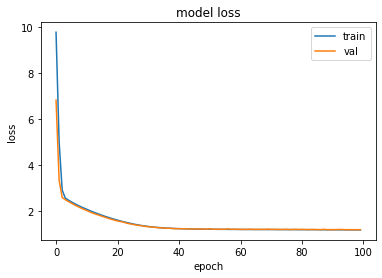

In [82]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [83]:
model.evaluate(X_test, y_test)

3000/3000 [==============================] - 0s 24us/sample - loss: 1.1587


1.1587189798355102

In [84]:
model.predict(X_test)

array([[3.5755742],
       [1.8691835],
       [3.9365354],
       ...,
       [3.7540705],
       [2.9579337],
       [2.9604812]], dtype=float32)

In [85]:
y_test

9324    4.208496
62      1.544645
2559    3.472602
2197    0.888309
8176    3.475933
          ...   
3779    5.457604
8864    4.496632
3836    4.077334
4297    2.367751
4247    2.728932
Name: force, Length: 3000, dtype: float64